# Spectrometer readers
> Read and convert spectrometers native format files

In [ ]:
#| default_exp dataset.readers

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| export
#import subprocess
from pathlib import Path
#from brukeropusreader import read_file
import brukeropusreader as bruker
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

## OPUS reader

Candidate OPUS readers:
- https://stuart-cls.github.io/python-opusfc-dist (unable to install it)
- https://github.com/qedsoftware/brukeropusreader (bug)
- https://github.com/spectrochempy/brukeropusreader (with bug fixed)

To install: conda install -c "spectrocat/label/dev" brukeropusreader

### Reading Opus

In [ ]:
#class Reader: 
#    def read(self):

In [ ]:
#| export
def read_opus(fname):
    """Read Bruker Optics OPUS file"""
    data = read_file(fname)
    wn = data.get_range("AB")
    spectrum = data["AB"]
    return spectrum, wn

In [ ]:
# open file
fname = '../_data/C2001USAK206/32987XS01.0'
# reader = Reader(type='OPUS')
# reader.read(fname)
spectrum, wn = read_opus(fname)

In [ ]:
#| export
def interp(x,  # input spectrum
           wn, # wavenumbers
           between = [4000, 600], # wavenumbers range of interest
           res=2, # wavenumbers resolution
           kind='linear', # interpolation type (ref. scipy)
          ):
    """Interpolate spectra within the proper range and at resolution of interest"""
    mask = np.logical_and(wn >= between[1], wn <= between[0])
    f = interpolate.interp1d(wns[mask], x[mask], kind=kind, fill_value="extrapolate")
    wn_new = np.arange(between[0], between[1], -res, dtype=int)
    return f(wn_new), wn_new

In [ ]:
spectrum, wn = interp(spectrum, wn)

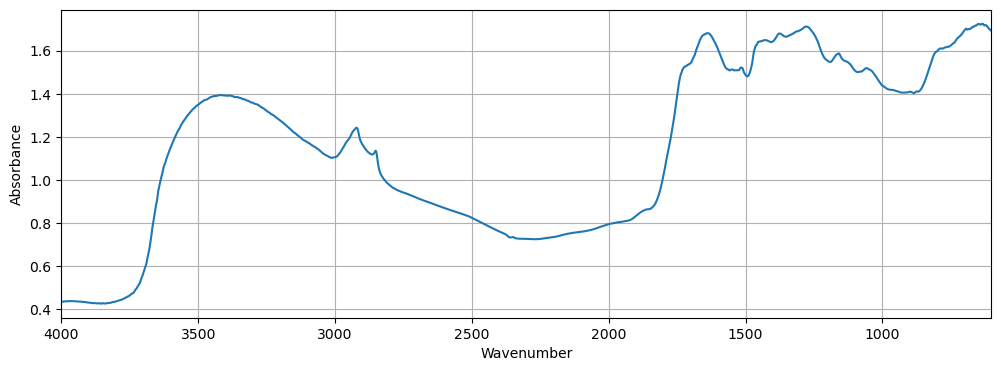

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlim(np.max(wn), np.min(wn))
ax.set(xlabel='Wavenumber', ylabel='Absorbance')
ax.set_axisbelow(True)
ax.grid(True, which='both')
_ = ax.plot(wn, spectrum)

In [ ]:
import os
import glob

In [ ]:
'27066XS03.0'.split('X')[0]

'27066'

In [ ]:
filenames_all = []
valid_name=['XN', 'XS']
for dirpath, dirnames, filenames in os.walk('/Volumes/BACKUP/KSSL/MIR_Spectral_Library'):
    #valid_files = [f for f in in_folder.rglob('*.0')
    #           if re.search(r'X.', f.name)[0] in valid_name]
    #print(filenames)
    filenames_all.append([f.split('X')[0] for f in filenames])